In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import sys, time
#import seaborn as sns

In [2]:
print('The program begins...')
## set parameters
wavelength = 633E-9               # wave length = 670 nm // equipped with red fluorescence
k = 2*np.pi/wavelength
focus = 200*10^-3            # the focus of lens after the ring mask
# *********************************
Rav1 = 200
dR1 = 50
R1 = Rav1-dR1/2
R2 = Rav1+dR1/2
# *********************************
Rav2 = 400
dR2 = 100
R3 = Rav2-dR2/2
R4 = Rav2+dR2/2
print('Parameters initialized!')

The program begins...
Parameters initialized!


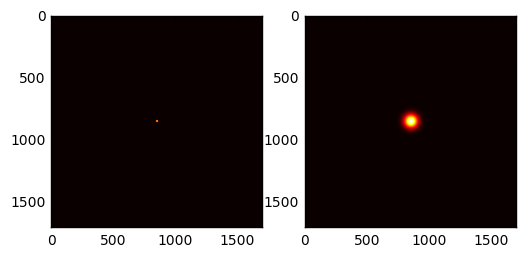

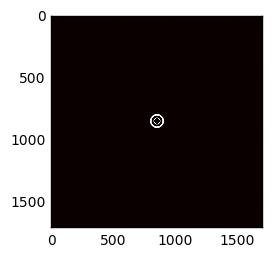

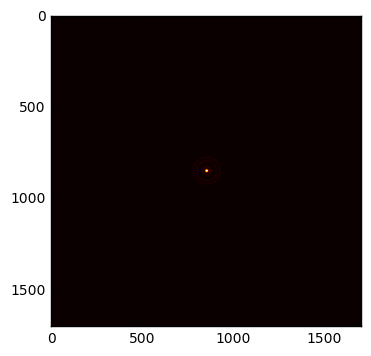

In [3]:
## set bead
x = np.linspace(-85,85,1700)
y = np.linspace(-85,85,1700)
[X,Y] = np.meshgrid(x,y)
XY = np.column_stack([X.flat, Y.flat])
#print('len(X)=',len(X),'\nlen(Y)=',len(Y))
mu = np.array([0,0])
sigma = np.array([[0.5**2,0],[0,0.5**2]])
dist = mvn.pdf(XY,mu,sigma)
bead = dist.reshape(X.shape)

## set ring mask 
magnitude = 80
rho = np.sqrt((X*magnitude)**2+(Y*magnitude)**2)
tA = 1*((rho>=R1)*(rho<=R2)+(rho>=R3)*(rho<=R4))

## propagation
ipt = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(bead)))
int_ipt = (np.abs(ipt))**2
int_ipt = int_ipt/np.max(int_ipt)

## STOP
r_stop = 2*1.45/np.sqrt(1.515**2-1.45**2)*1000
stop = 1*((np.sqrt((X*magnitude)**2+(Y*magnitude)**2))<=r_stop)

## propagation 2
opt = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ipt*tA*stop)))
int_opt = (np.abs(opt))**2
int_opt = int_opt/np.max(int_opt)
## plotting ############################################
plt.figure()
plt.subplot(1,2,1),plt.imshow(bead,cmap=plt.cm.hot)
plt.subplot(1,2,2),plt.imshow(int_ipt,cmap=plt.cm.hot)
plt.show()

plt.figure()
plt.subplot(1,2,1),plt.imshow(tA,cmap=plt.cm.hot)
#plt.subplot(1,2,2),plt.imshow(int_opt,cmap=plt.cm.hot)
plt.show()

plt.figure()
plt.imshow(int_opt,cmap=plt.cm.hot)
plt.show()

In [13]:
## save images to files
from skimage import io
io.imsave('psf.bmp',int_opt)

C:\Users\xuanwen\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: psf.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\xuanwen\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [19]:
from __future__ import division
 
#import sys,time
from progressbar import *
total = 1000
 
#基本用法
progress = ProgressBar()
for i in progress(range(total)):
    time.sleep(0.01)
pbar = ProgressBar().start()
for i in range(1,1000):
    pbar.update(int((i/(total-1))*100))
    time.sleep(0.01)
pbar.finish()
 
#高级用法
widgets = ['Progress: ', Percentage(), ' ', Bar(marker=RotatingMarker('>-=')),
           ' ', ETA(), ' ', FileTransferSpeed()]
pbar = ProgressBar(widgets=widgets, maxval=10000000).start()
for i in range(1000000):
    pbar.update(10*i+1)
    time.sleep(0.0001)
pbar.finish()

100% (1000 of 1000) |#############################################################| Elapsed Time: 0:00:13 Time: 0:00:13
100% (100 of 100) |###############################################################| Elapsed Time: 0:00:12 Time: 0:00:12
Progress:   2% |>                                                                            | ETA: 0:47:13   3.3 KiB/s

KeyboardInterrupt: 